# Herramientas Computacionales y Algoritmos
## Segundo Examen Parcial 
# Primavera 2021

# 100

## Ejercicio 1 (75 puntos)

### En el archivo best.xlsx se han concentrado los datos de 173 razas de perros  evaluados por el  American Kennel Club. La descripcion de las columnas se muestra a continuacion

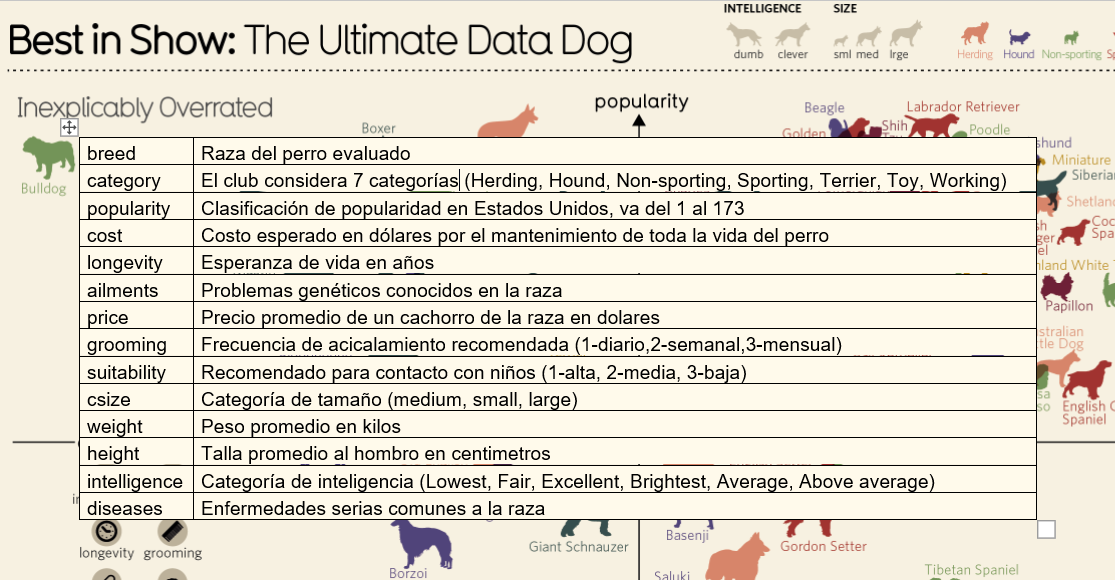

### Utilizando pandas determina lo que se pide.

# Nota: El resultado debe ser lo mas acotado posible, si pido la informacion por ejemplo de un pais lo ideal es tratar de mostrar solo ese pais y no un listado de 50 paises donde yo tengo que buscar el pais que pido.

# Tambien recuerden que si la tabla resulta muy grande solo muestra encabezado y pie, eso es normal.

In [1]:
import pandas as pd

In [3]:
p=pd.read_excel("best.xlsx")

In [4]:
p

,breed,category,popularity,cost,longevity,ailments,price,grooming,suitability,csize,weight,height,intelligence,diseases
0,Labrador Retriever,sporting,1,21299,13,2,623,2,3,medium,13.0,51,Brightest,"eye problems, deafness"
1,German Shepherd,herding,2,17416,14,0,833,2,1,small,6.0,22,Above average,none
2,Beagle,hound,3,19468,13,0,618,2,2,medium,16.0,48,Excellent,none
3,Golden Retriever,sporting,4,21447,14,2,435,2,1,small,6.0,25,Above average,"lion jaw, heart problems"
4,Yorkshire Terrier,toy,5,20701,12,1,750,2,1,medium,10.0,46,Above average,hip problems
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Otterhound,hound,169,24058,13,0,no data,2,2,small,14.0,34,Fair,none
168,Norwegian Lundehund,non-sporting,170,13814,13,0,no data,2,2,large,12.0,61,Average,none
169,English Foxhound,hound,171,21309,13,0,no data,2,2,medium,9.0,51,Fair,none
170,Harrier,hound,172,14646,10,0,757,2,1,medium,5.0,58,Average,none


## Determina el peso y estatura maximo de la categoria hound(10 puntos) 10

In [91]:
p[p.category=="hound"].pivot_table(index="category", values=["weight", "height"], aggfunc="max")

,height,weight
category,,
hound,72,59.0


In [10]:
print("Peso máximo: ",p[p.category=="hound"].weight.max())
print("Estatura máxima: ",p[p.category=="hound"].height.max())

Peso máximo:  59.0
Estatura máxima:  72


In [18]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         172 non-null    object 
 1   category      172 non-null    object 
 2   popularity    172 non-null    int64  
 3   cost          172 non-null    int64  
 4   longevity     172 non-null    int64  
 5   ailments      172 non-null    int64  
 6   price         172 non-null    object 
 7   grooming      172 non-null    int64  
 8   suitability   172 non-null    int64  
 9   csize         172 non-null    object 
 10  weight        172 non-null    float64
 11  height        172 non-null    int64  
 12  intelligence  172 non-null    object 
 13  diseases      172 non-null    object 
dtypes: float64(1), int64(7), object(6)
memory usage: 18.9+ KB


## Determina entre el grupo de perros que tienen un mantenimiento esperado entre 10000 y 20000 dolares o son categoria toy con una expectativa de vida de al menos 10 años. Grafica en barras para esta el numero de razas que existen por categoria y nivel de inteligencia. (20 puntos) 20

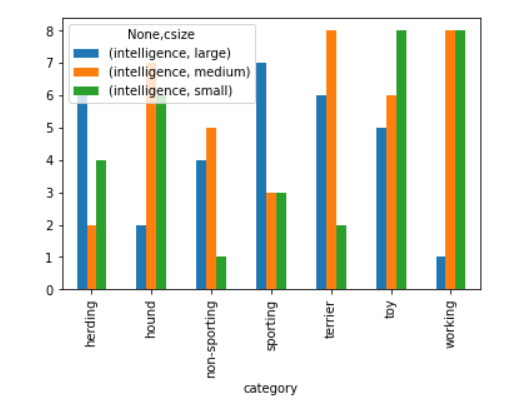

<AxesSubplot:xlabel='category'>

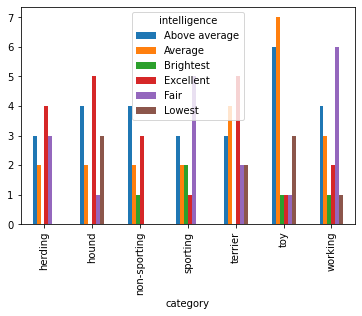

In [20]:
p.query("(cost>=10000 and cost<=20000)  or (category=='toy' and longevity>=10)").pivot_table(index="category", columns="intelligence", values="breed", aggfunc="count").plot(kind="bar")

## Encuentra el porcentaje de los perros que pesan mas que el peso promedio de todos los perros (10 puntos) 10

In [22]:
len(p[p.weight>p.weight.mean()])*100/len(p)

26.74418604651163

## El American Kennel Club te ha pedido que calcules un score para cada raza, se calcula con la formula es:

###    redondeado(costo manutencion/10000 + longevidad*0.1 + afinidad con niños*0.2 + factor de inteligencia)

### donde el factor de inteligencia es:

    + si la raza se catalogo como Brightest el factor es 1
    + si la raza se catalogo como Above average el factor es 0.5
    + si la raza se catalogo como cualquier otra cosa el factor es 0.3
    
   ### Desarrolla una funcion para obtener el score, aplicalo para crear una nueva columna y determina que porcentaje de los perros cae en cada score (35 puntos)  35

In [23]:
import numpy as np

In [24]:
def score (x):
    if x.intelligence=="Brightest":
        return round(x.cost/10000+x.longevity*0.1+x.suitability*0.2+1)
    elif x.intelligence=="Above average":
        return round(x.cost/10000+x.longevity*0.1+x.suitability*0.2+0.5)
    else: 
        return round(x.cost/10000+x.longevity*0.1+x.suitability*0.2+0.3)

In [26]:
p["score"]=p.apply(score, axis=1)

In [27]:
p

,breed,category,popularity,cost,longevity,ailments,price,grooming,suitability,csize,weight,height,intelligence,diseases,score
0,Labrador Retriever,sporting,1,21299,13,2,623,2,3,medium,13.0,51,Brightest,"eye problems, deafness",5
1,German Shepherd,herding,2,17416,14,0,833,2,1,small,6.0,22,Above average,none,4
2,Beagle,hound,3,19468,13,0,618,2,2,medium,16.0,48,Excellent,none,4
3,Golden Retriever,sporting,4,21447,14,2,435,2,1,small,6.0,25,Above average,"lion jaw, heart problems",4
4,Yorkshire Terrier,toy,5,20701,12,1,750,2,1,medium,10.0,46,Above average,hip problems,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Otterhound,hound,169,24058,13,0,no data,2,2,small,14.0,34,Fair,none,4
168,Norwegian Lundehund,non-sporting,170,13814,13,0,no data,2,2,large,12.0,61,Average,none,3
169,English Foxhound,hound,171,21309,13,0,no data,2,2,medium,9.0,51,Fair,none,4
170,Harrier,hound,172,14646,10,0,757,2,1,medium,5.0,58,Average,none,3


<AxesSubplot:ylabel='score'>

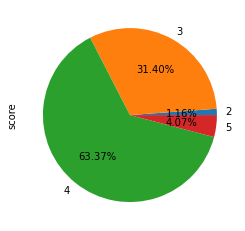

In [32]:
p.groupby("score").score.count().plot(kind="pie", autopct="%1.2f%%")

# Ejercicio 2 (25 Puntos) 25

## Los sueldos de un grupo de de empleados se encuentran en el archivo sueldos.txt que se te entrega. Importa los datos, guardalos y separalos para posteriormente responder a lo que se pide.

In [78]:
id=open("sueldos.txt","r")
sueldos=id.read()
id.close()

In [79]:
sueldos

'13176.9,13310.2,6243.4,11265.1,9714.1,5314.7,12546.5,6303.2,9059.8,10241.2,7166.1,11581.9,11759.8,6558.7,10025.6,12288.3,7838.1,7000.4,10733.2,10756.1,8747.7,9565.2,5094.9,11322.3,5426.5,9990.5,10084.6,11521.3,10064.4,8597.9,11145.8,9744.8,12633.1,11532.0,9792.9,13429.9,13189.5,6167.1,14925.3,7067.9,11385.3,8411.1,11107.8,11938.8,5956.3,8580.0,7241.8,8973.8,12833.6,6713.5,10245.3,14002.3,7160.0,14901.2,14806.2,12735.8,14739.8,10230.5,12623.2,9463.6,13873.5,8271.8,11014.3,12412.3,14475.4,12864.6,11429.6,12603.1,10699.4,11866.1,11635.4,7588.5,8822.0,9331.2,11342.4,11707.1,11779.8,9440.3,11748.7,9791.5,11627.5,9920.3,7086.0,7769.7,10954.7,7324.0,5618.3,9479.4,10368.2,6208.0,6242.0,6028.9,8721.2,10380.0,11927.2,12318.2,5251.4,11945.8,11892.7,13800.5'

In [80]:
s2=sueldos.split(",")

In [81]:
s2

['13176.9',
 '13310.2',
 '6243.4',
 '11265.1',
 '9714.1',
 '5314.7',
 '12546.5',
 '6303.2',
 '9059.8',
 '10241.2',
 '7166.1',
 '11581.9',
 '11759.8',
 '6558.7',
 '10025.6',
 '12288.3',
 '7838.1',
 '7000.4',
 '10733.2',
 '10756.1',
 '8747.7',
 '9565.2',
 '5094.9',
 '11322.3',
 '5426.5',
 '9990.5',
 '10084.6',
 '11521.3',
 '10064.4',
 '8597.9',
 '11145.8',
 '9744.8',
 '12633.1',
 '11532.0',
 '9792.9',
 '13429.9',
 '13189.5',
 '6167.1',
 '14925.3',
 '7067.9',
 '11385.3',
 '8411.1',
 '11107.8',
 '11938.8',
 '5956.3',
 '8580.0',
 '7241.8',
 '8973.8',
 '12833.6',
 '6713.5',
 '10245.3',
 '14002.3',
 '7160.0',
 '14901.2',
 '14806.2',
 '12735.8',
 '14739.8',
 '10230.5',
 '12623.2',
 '9463.6',
 '13873.5',
 '8271.8',
 '11014.3',
 '12412.3',
 '14475.4',
 '12864.6',
 '11429.6',
 '12603.1',
 '10699.4',
 '11866.1',
 '11635.4',
 '7588.5',
 '8822.0',
 '9331.2',
 '11342.4',
 '11707.1',
 '11779.8',
 '9440.3',
 '11748.7',
 '9791.5',
 '11627.5',
 '9920.3',
 '7086.0',
 '7769.7',
 '10954.7',
 '7324.0',
 '561

# A cada uno de los empleados se le debe retener el 30% de sueldo como pago de impuestos, determina el numero de empleados que hay y calcula el pago total que se debe hacer a hacienda. Escribe tus resultados al final del mismo archivo.

In [82]:
s=[float(i) for i in s2]

In [83]:
len(s)

100

In [84]:
def retencion (s):
    sum=0
    i=len(s)
    for j in range(0, i):
        sum=sum+s[j]*0.3
    return sum

In [85]:
id=open("sueldos.txt","a")
n="Numero de empleados: "+str(len(s))+"\nPago total a hacienda: "+str(retencion(s))
id.write(n)
id.close()

In [86]:
id=open("sueldos.txt","r")
pruebaleer=id.read()
id.close()

In [88]:
pruebaleer

'13176.9,13310.2,6243.4,11265.1,9714.1,5314.7,12546.5,6303.2,9059.8,10241.2,7166.1,11581.9,11759.8,6558.7,10025.6,12288.3,7838.1,7000.4,10733.2,10756.1,8747.7,9565.2,5094.9,11322.3,5426.5,9990.5,10084.6,11521.3,10064.4,8597.9,11145.8,9744.8,12633.1,11532.0,9792.9,13429.9,13189.5,6167.1,14925.3,7067.9,11385.3,8411.1,11107.8,11938.8,5956.3,8580.0,7241.8,8973.8,12833.6,6713.5,10245.3,14002.3,7160.0,14901.2,14806.2,12735.8,14739.8,10230.5,12623.2,9463.6,13873.5,8271.8,11014.3,12412.3,14475.4,12864.6,11429.6,12603.1,10699.4,11866.1,11635.4,7588.5,8822.0,9331.2,11342.4,11707.1,11779.8,9440.3,11748.7,9791.5,11627.5,9920.3,7086.0,7769.7,10954.7,7324.0,5618.3,9479.4,10368.2,6208.0,6242.0,6028.9,8721.2,10380.0,11927.2,12318.2,5251.4,11945.8,11892.7,13800.5Numero de empleados: 100\nPago total a hacienda: 304361.33999999985'